<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/EDO/Solucion_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de Ecuaciones Diferenciales

Una de las principales herramientas matemáticas para resolver problemas en física son la Ecuaciones Diferenciales. El ejemplo más característico es la conocida Ley de Newton

$$
\sum F = m \frac{d^2x}{dt^2}
$$

Las Ecuaciones Diferenciales Ordinarias (EDO), son aquellas en las que hay una úncia variable de integración (variable independiente).

Empecemos con un ejemplo más sencillo de la forma

$$
\frac{dx}{dt}=f(x,t)
$$

La idea es calcular la función $x(t)$ que cumple la ecuación diferencial arriba especificada. Para poder calcular la solución $x(t)$ de la ecuación anterior es necesario especificar una condición inicial (IVP), es decir, debemos conocer el valor de $x$ en un cierto instante, por ejemplo en $t=0$.

Veamos algunos métodos de solución numérica de EDO (integración)

## Método de Euler

La expansión en series de Taylor de la función $x(t+h)$, es decir nuestra función en un valor de $t$ conocido $x(t)$ más un intervalo pequeño $h$ es

$$
x(t+h)=x(t)+h\frac{dx}{dt}+\frac{1}{2}h^2 \frac{d^2x}{dt^2}+...
$$

$$
x(t+h)=x(t) + h f(x,t) + O(h^2)
$$

Nótese que para $h$ pequeño, los términos $h^2$ y de orden superior son negligibles. Este es el fundamento del método de Euler para EDO. La representación gráfica del método de Euler es la siguiente:




Use el método de Euler para resolver la ecuación diferencial

$$
\frac{dx}{dt}=-x^3+\sin(t)
$$

s.t $x(t=0)=1$

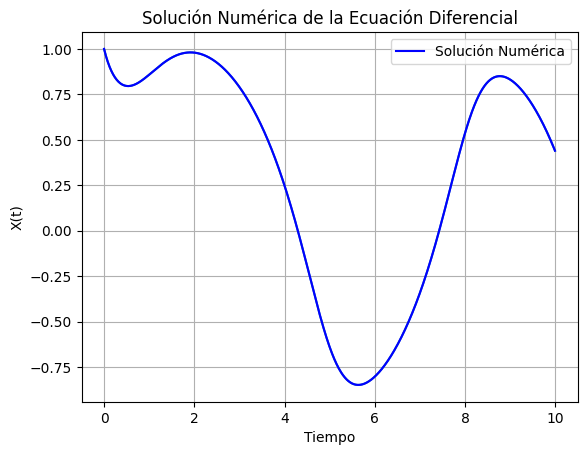

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def fun(x,t):
  f=-x**3 + np.sin(t)
  return f

h=0.01
t=np.arange(0,10,h)
xsol=np.zeros(len(t))
xsol[0]=1
for i in range(len(t)-1):
  xsol[i+1]=xsol[i]+h*fun(xsol[i],t[i])

plt.figure
plt.plot(t,xsol)
# Graficando

plt.plot(t, xsol, label='Solución Numérica', color='blue')
plt.title('Solución Numérica de la Ecuación Diferencial')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

## Método de Runge-Kutta

Los métodos de Runge-Kutta son una familia de métodos que hacen uso de algunos pasos extra para mejorar la aproximación de la solución. El primero de los métodos es el llamado RK de Orden 2, o también conocido como método de Euler con Predicción-Corrección.

Reescribamos el método de Euler de un modo más sugestivo:

$$
x(t+h)=x(t)+h f(x,t)
$$

Observe que en el método de Euler tradicional usamos la información de $f(x,t)$ en el paso anterior $t$, para predecir lo que ocurre en el paso $t+h$. Idealmente, $f(x,t)$ debería ser el valor de la derivada a mitad de camino entre $t$ y $t+h$. Esta es la idea del método de RK de orden 2

<ol>
    <li> Usar el método de Euler tradicional para aproximar la solución a mitad de camino entre $t$ y $t+h$. Es decir, calcular $x(t+h/2)$. <b> Paso Predictor </b> </li>
    <li> Volver nuevamente al paso anterior y usar un paso de tamaño $h$, usando como valor de $x$ y $t$ en el r.h.s el que hallamos en el paso 1. <b> Paso Corrector </b> </li>   
    
</ol>    

De forma compacta se puede escribir el método como:

$$
x(t+h)=x(t)+hf(x(t+h/2),t+h/2)
$$
    
Esto puede resumirse a

$$
k_1 = h f(x,t)
$$

$$
k_2 = h f(x+k_1/2,t+h/2)
$$

$$
x(t+h)=x(t)+k_2
$$





Use el método de RK2 para integrar el mismo problema del ejercicio

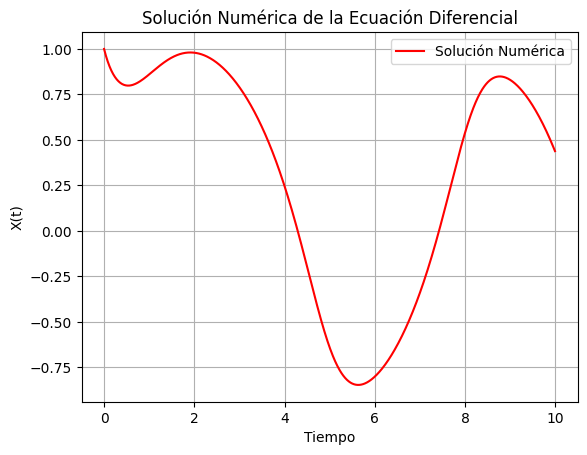

In [ ]:
#método de Runge Kutta 2
import numpy as np
from matplotlib import pyplot as plt
def fun(x,t):
  f=-x**3 + np.sin(t)
  return f

h=0.01
t=np.arange(0,10,h)
xsol=np.zeros(len(t))
xsol[0]=1
for i in range(len(t)-1):
  k1=h*fun(xsol[i],t[i])
  k2=h*fun(xsol[i]+k1/2,t[i]+h/2)
  xsol[i+1]=xsol[i]+ k2

# Graficando

plt.plot(t, xsol, label='Solución Numérica', color='red')
plt.title('Solución Numérica de la Ecuación Diferencial')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

## Método RK4

Usando una combinación adecuada de estimaciones de la pendiente a mitad de camino entre $t$ y $t+h$ se generan los idferentes métodos de Runge-Kuta. El más común de todos es el método de RK de orden 4, el cual hace uso de 4 estimaciones de la pendiente así

$$
k_1 = f(x,t) \\
k_2 = f\left(x+\frac{1}{2}hk1,t+\frac{1}{2}h \right) \\
k_3 = f\left(x+\frac{1}{2}hk2,t+\frac{1}{2}h \right) \\
k_4 = f\left(x+hk_3,t+h \right)
$$

Y ponderando la pendientes adecuadamente estimamos el siguiente paso como

$$
x(t+h) = x(t) + \frac{1}{6}h(k_1+2k_2+2k_3+k_4)
$$



Implemente el método de RK de orden 4 y utilícelo para resolver la Ecuación diferencial del ejercicio anterior

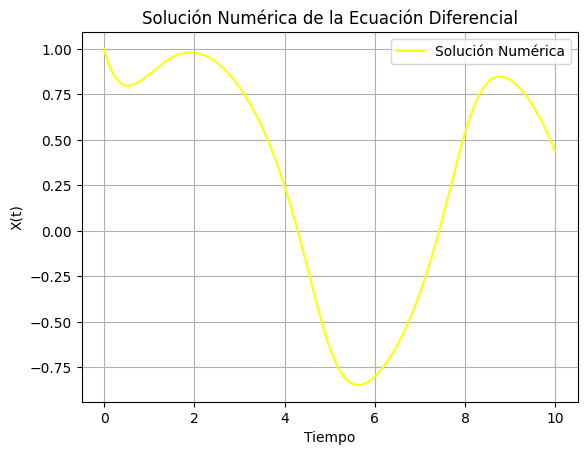

In [ ]:
#método de Runge Kutta 4
import numpy as np
from matplotlib import pyplot as plt
def fun(x,t):
  f=-x**3 + np.sin(t)
  return f

h=0.01
t=np.arange(0,10,h)
xsol=np.zeros(len(t))
xsol[0]=1
for i in range(len(t)-1):
  k1=fun(xsol[i],t[i])
  k2=fun(xsol[i]+(h*k1)/2,t[i]+h/2)
  k3=fun(xsol[i]+(h*k2)/2,t[i]+h/2)
  k4=fun(xsol[i]+ h*k3,t[i]+h)
  xsol[i+1]=xsol[i] + h/6 * (k1+2*k2+2*k3+k4)

# Graficando

plt.plot(t, xsol, label='Solución Numérica', color='yellow')
plt.title('Solución Numérica de la Ecuación Diferencial')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

Nuevamente, existen métodos de solución de EDO en python que podemos fácilmente ejecutar. Observe

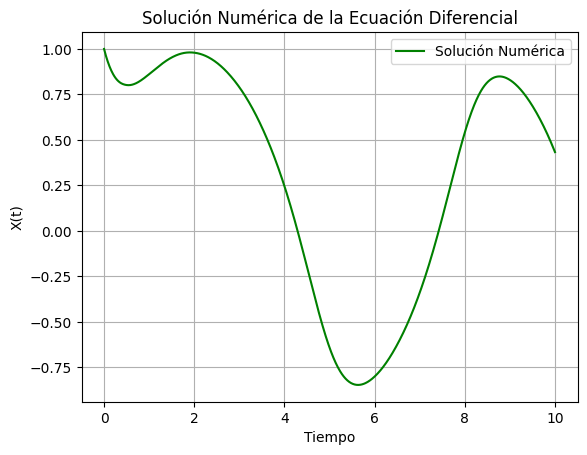

In [ ]:
from scipy.integrate import solve_ivp
def fun(t,x):
  f=-x**3 + np.sin(t)
  return f

xsol[0]=1
t_span=(0,10)
solucion = solve_ivp(fun, t_span, [1], method='RK45', dense_output=True) #dense_output=True interpolar solución
tiempo=np.linspace(t_span[0],t_span[1],1000)
x=solucion.sol(tiempo)[0]
# Graficando
plt.plot(tiempo, x, label='Solución Numérica', color='green')
plt.title('Solución Numérica de la Ecuación Diferencial')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

## Solución de sistemas de ecuaciones acopladas

Los métodos arriba descritos pueden ser todos extrapolables a sistemas de ecuaciones diferenciales con varias variables tal y como lo muestra el siguiente problema


El proceso bioquímico de la Glicólisis puede ser modelado a través de las ecuaciones

$$
\frac{dx}{dt}= -x+ay +x^2 y; \qquad  \frac{dy}{dt}=b-ay-x^2y
$$

En una ocasión anterior calculamos los puntos estacionarios. Pero cómo es la dinámica de este sistema?

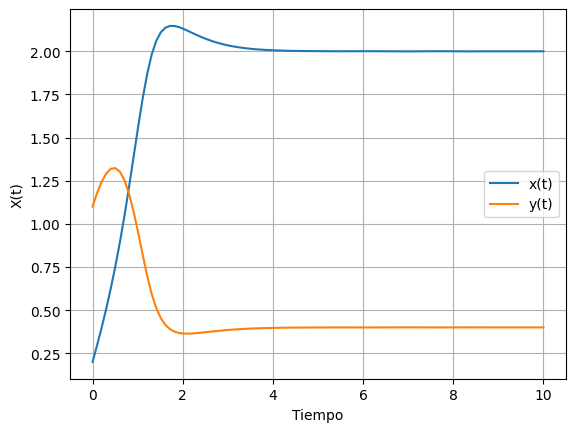

In [ ]:
from scipy.integrate import solve_ivp
def func(t, x, a, b):
    return [-x[0] + a * x[1] + x[0]**2 * x[1], b - a * x[1] - x[0]**2 * x[1]]

# Condiciones iniciales
x0 = [0.2, 1.1]
a=1
b=2
# Definir el tiempo en el que se quiere resolver el sistema
t_span = (0, 10)
# Resolver el sistema de ecuaciones diferenciales con solve_ivp
sol1 = solve_ivp(func, t_span, x0, dense_output=True, args=(a,b))
t_tiempo = np.linspace(0, 10, 100)
x=sol1.sol(t_tiempo)
# Graficar los resultados
plt.plot(t_tiempo, x[0], label='x(t)')
plt.plot(t_tiempo, x[1], label='y(t)')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.grid(True)
plt.show()